In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.misc import factorial

np.random.seed(0)
%matplotlib inline

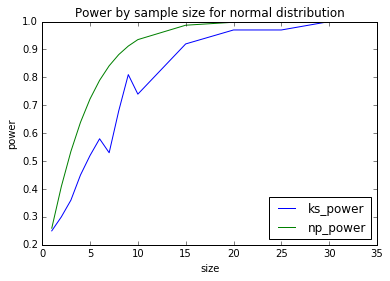

In [36]:
ks_power = []
np_power = []

θ0 = 0
θ1 = 1
α = 0.05

test_num = 100

N = list(range(1, 10)) + list(range(10, 40, 5))

for n in N:
    res = 0
    for _ in range(test_num):
        res += (stats.kstest(rvs=np.random.normal(θ1, 1, n), cdf='norm', args=(θ0,1), N=n)[1] < α)
    ks_power.append(res / test_num)
    np_power.append(1 - stats.norm.cdf(stats.norm.ppf(1-α) + (θ0 - θ1) * np.sqrt(n)))
    
plt.plot(N, ks_power, label="ks_power")
plt.plot(N, np_power, label="np_power")
plt.title("Power by sample size for normal distribution")
plt.xlabel("size")
plt.ylabel("power")
plt.legend(loc=0)
plt.show()

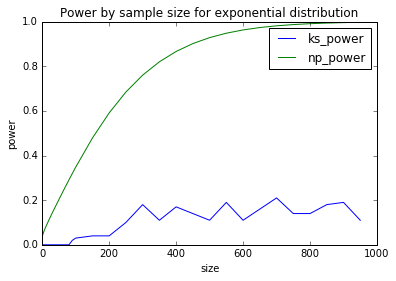

In [37]:
ks_power = []
np_power = []

θ0 = 1
θ1 = 1.15
α = 0.05

test_num = 100

N = list(range(1, 10)) + list(range(10, 100, 10)) + list(range(100, 1000, 50))

for n in N:
    res = 0
    for _ in range(test_num):
        res += (stats.kstest(rvs=np.random.exponential(θ0, n), cdf='expon', args=(0, θ1), N=n)[0] < α)
    ks_power.append(res / test_num)
    np_power.append(stats.norm.cdf(stats.norm.ppf(α) * θ1 / θ0 + (θ1 / θ0 - 1) * np.sqrt(n)))
    
plt.plot(N, ks_power, label="ks_power")
plt.plot(N, np_power, label="np_power")
plt.title("Power by sample size for exponential distribution")
plt.xlabel("size")
plt.ylabel("power")
plt.legend(loc=0)
plt.show()

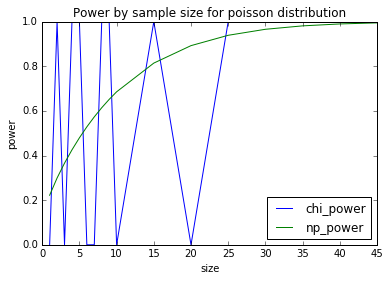

In [128]:
chi_power = []
np_power = []

θ0 = 2
θ1 = 3
α = 0.05

test_num = 100

N = list(range(1, 10)) + list(range(10, 50, 5))

for n in N:
    res = 0
    
    X = np.random.poisson(θ1, n)
    p = np.arange(X.max()+1)
    p = np.exp(-θ0) * np.power(θ0, p) / factorial(p)
    
    for _ in range(test_num):
        res += (stats.chisquare(f_obs=np.bincount(X), f_exp=n*p)[1] < α)
    chi_power.append(res / test_num)
    np_power.append(1 - stats.norm.cdf(stats.norm.ppf(1-α) * np.sqrt(θ0/θ1) + np.sqrt(n) * (θ0-θ1) / np.sqrt(θ1)))
    
plt.plot(N, chi_power, label="chi_power")
plt.plot(N, np_power, label="np_power")
plt.title("Power by sample size for poisson distribution")
plt.xlabel("size")
plt.ylabel("power")
plt.legend(loc=0)
plt.show()